In [48]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt


from pathlib import Path
current_dir = Path(".").resolve()
project_dir= Path(current_dir).parent

In [49]:
query ="""
    SELECT 
    *
    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` LIMIT 1000
    """
df = pd.read_gbq(query)
df.head()

    

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


In [50]:
#Llamar solo los datos numericos de la tabla
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [51]:
#Estadistica descriptiva de los datos
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


<AxesSubplot:>

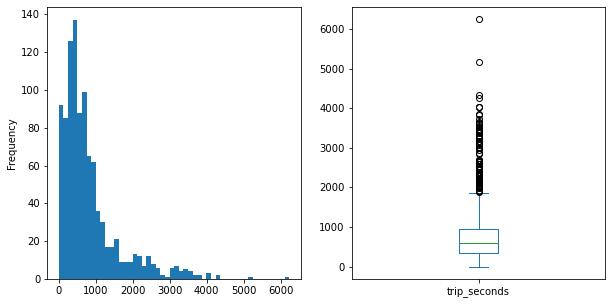

In [52]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
num_df["trip_seconds"].plot(kind="hist", bins=50,  ax=ax[0])
num_df["trip_seconds"].plot(kind="box",             ax=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


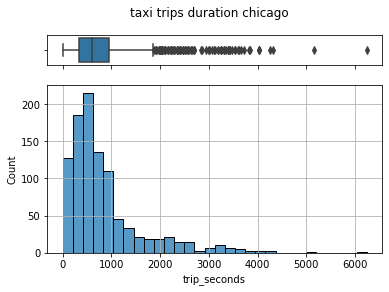

In [53]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()

#Guardar la imagen
plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


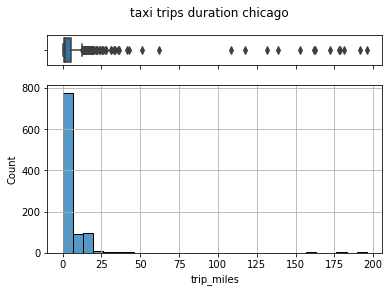

In [54]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_miles"], ax=ax_box)
sns.histplot(data=num_df, x="trip_miles", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()



In [55]:
#TAREA: Realizar los graficos para todas las variables

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


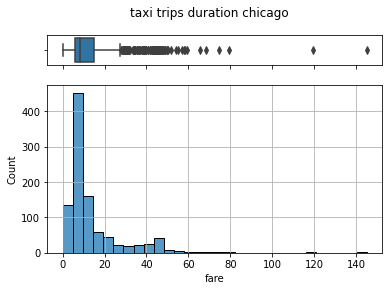

In [56]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["fare"], ax=ax_box)
sns.histplot(data=num_df, x="fare", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


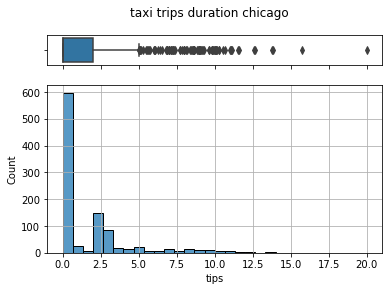

In [57]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["tips"], ax=ax_box)
sns.histplot(data=num_df, x="tips", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


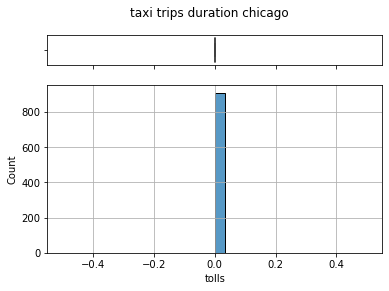

In [58]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["tolls"], ax=ax_box)
sns.histplot(data=num_df, x="tolls", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


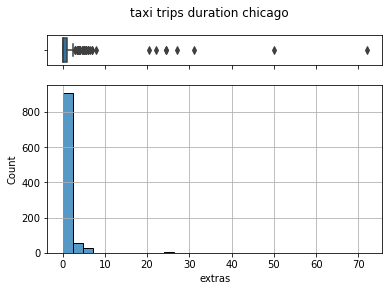

In [59]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["extras"], ax=ax_box)
sns.histplot(data=num_df, x="extras", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


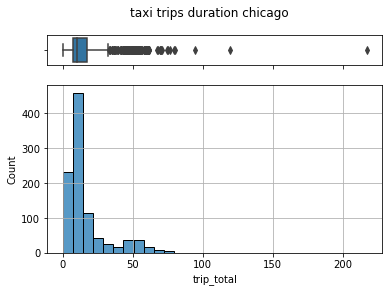

In [60]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_total"], ax=ax_box)
sns.histplot(data=num_df, x="trip_total", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()

In [61]:
#Las otras variables al ser sus datos nulos el resultado de sus graficas es blanco

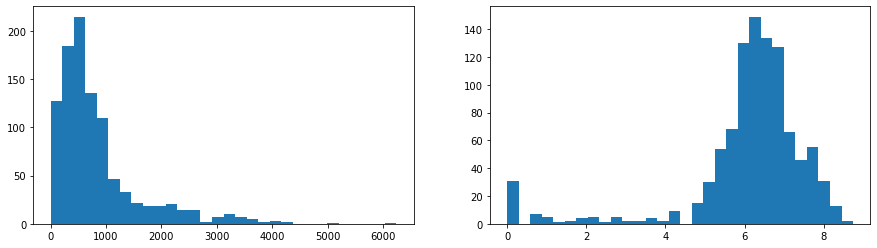

In [62]:
x = num_df["trip_seconds"]
log_x = np.log(x+1)
f, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x, bins=30)
#El ; es para evitar los datos que salen encima del histograma como un analisis
ax[1].hist(log_x,bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

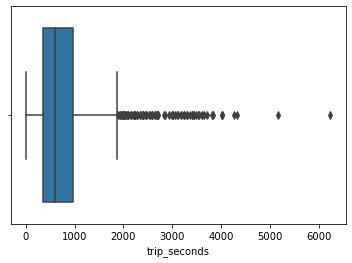

In [63]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

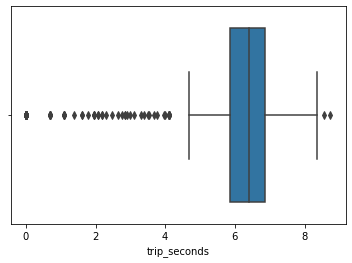

In [64]:
sns.boxplot(log_x)

In [65]:
log_x.describe()

count    1000.000000
mean        6.101627
std         1.595560
min         0.000000
25%         5.853610
50%         6.398595
75%         6.867974
max         8.738896
Name: trip_seconds, dtype: float64

In [66]:
np.exp(log_x.mean())

446.58359990923947

(0.0, 10.0)

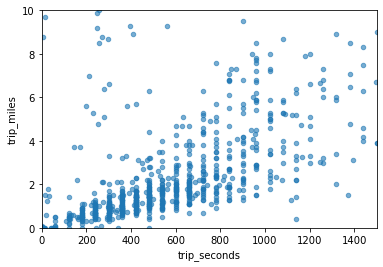

In [67]:
#Alpha es el difuminador y muestra donde los datos estan mas acumulados
num_df.plot(kind="scatter", x="trip_seconds", y="trip_miles", alpha=0.6)
#Se colocan los limites del cuadro, en este caso x va de 0 a 1500 y Y de 0 a 10
plt.xlim(0,1500)
plt.ylim(0,10)

In [68]:
#Realizar la correlación de dos variables
#TAREA: Realizar el estudio de correlación con las otras variables, segundos con todos
x="trip_seconds"
y="trip_miles"
num_df[[x,y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


In [69]:
x="trip_seconds"
f="fare"
num_df[[x,f]].corr()

,trip_seconds,fare
trip_seconds,1.000000,0.811545
fare,0.811545,1.000000


In [70]:

x="trip_seconds"
t="tips"
num_df[[x,t]].corr()


,trip_seconds,tips
trip_seconds,1.000000,0.465293
tips,0.465293,1.000000


In [71]:
x="trip_seconds"
to="tolls"
num_df[[x,to]].corr()

,trip_seconds,tolls
trip_seconds,1.0,NaN
tolls,NaN,NaN


In [72]:
x="trip_seconds"
e="extras"
num_df[[x,e]].corr()

,trip_seconds,extras
trip_seconds,1.000000,0.223759
extras,0.223759,1.000000


In [73]:
x="trip_seconds"
tt="trip_total"
num_df[[x,tt]].corr()

,trip_seconds,trip_total
trip_seconds,1.000000,0.777201
trip_total,0.777201,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

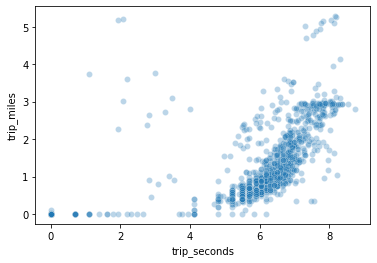

In [74]:
log_x = np.log(num_df[x] + 1)
log_y = np.log(num_df[y] + 1)
sns.scatterplot(x=log_x,y=log_y, alpha=0.3)

In [75]:
#Creo una tabla nueva con los logaritmos de esas dos variable para realizar una correlación
log_num_df = pd.DataFrame(
    columns=[x,y]
)

log_num_df[x] = log_x
log_num_df[y] = log_y
log_num_df.corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


In [76]:
log_num_df.head()

,trip_seconds,trip_miles
0,6.398595,0.587787
1,6.867974,2.151762
2,8.006701,2.653242
3,7.705713,2.580217
4,7.353082,2.809403


In [77]:
#TAREA: Realizar el estudio de correlación con las otras variables, segundos con todos

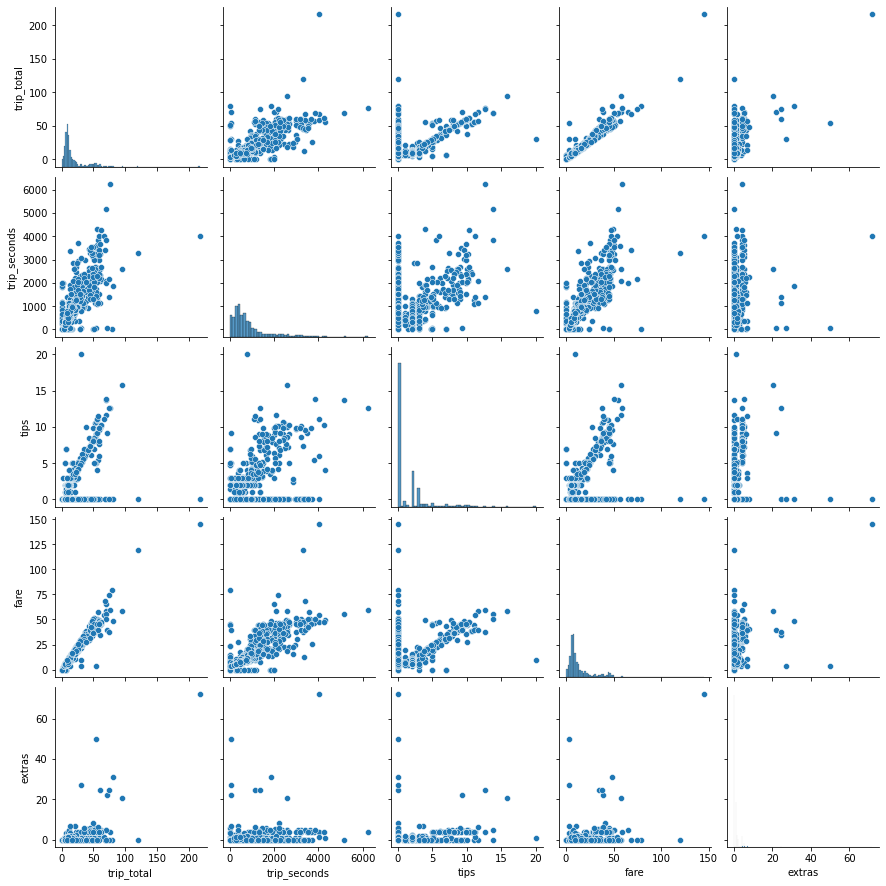

In [78]:
cols = ["trip_total", "trip_seconds","tips","fare", "extras"]
sns.pairplot(data=num_df[cols])

<AxesSubplot:>

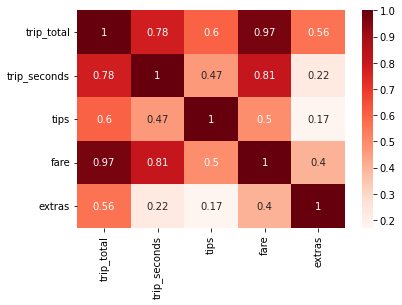

In [79]:
correlations = num_df[cols].corr()
sns.heatmap(correlations, cmap="Reds", annot=True)

In [80]:
#TAREA: Constuir el grafico con las variables numericas transformadas a logaritmos

In [81]:
log_x = np.log(num_df[x] + 1)
log_y = np.log(num_df[y] + 1)
log_f = np.log(num_df[f] + 1)
log_t = np.log(num_df[t] + 1)
log_to = np.log(num_df[to] + 1)
log_e = np.log(num_df[e] + 1)
log_tt = np.log(num_df[tt] + 1)


In [82]:
log_num_df = pd.DataFrame(
    columns=[x,y,f,t,to,e,tt]
)

log_num_df[x] = log_x
log_num_df[y] = log_y
log_num_df[f] = log_f
log_num_df[t] = log_t
log_num_df[to] = log_to
log_num_df[e] = log_e
log_num_df[tt] = log_tt

log_num_df.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total
0,6.398595,0.587787,2.047693,1.098612,0.0,0.000000,2.327278
1,6.867974,2.151762,3.113515,0.000000,0.0,0.000000,3.113515
2,8.006701,2.653242,3.637586,0.000000,0.0,0.000000,3.637586
3,7.705713,2.580217,3.597312,1.957274,0.0,1.704748,3.862413
4,7.353082,2.809403,3.695110,2.266958,0.0,1.609438,3.977811


<AxesSubplot:>

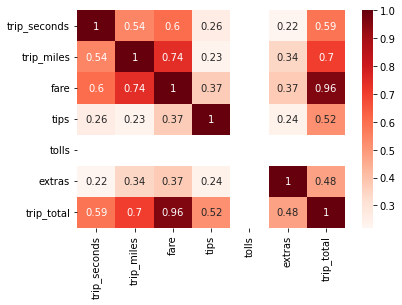

In [83]:
correlations_log = log_num_df.corr()
sns.heatmap(correlations_log, cmap="Reds", annot=True)

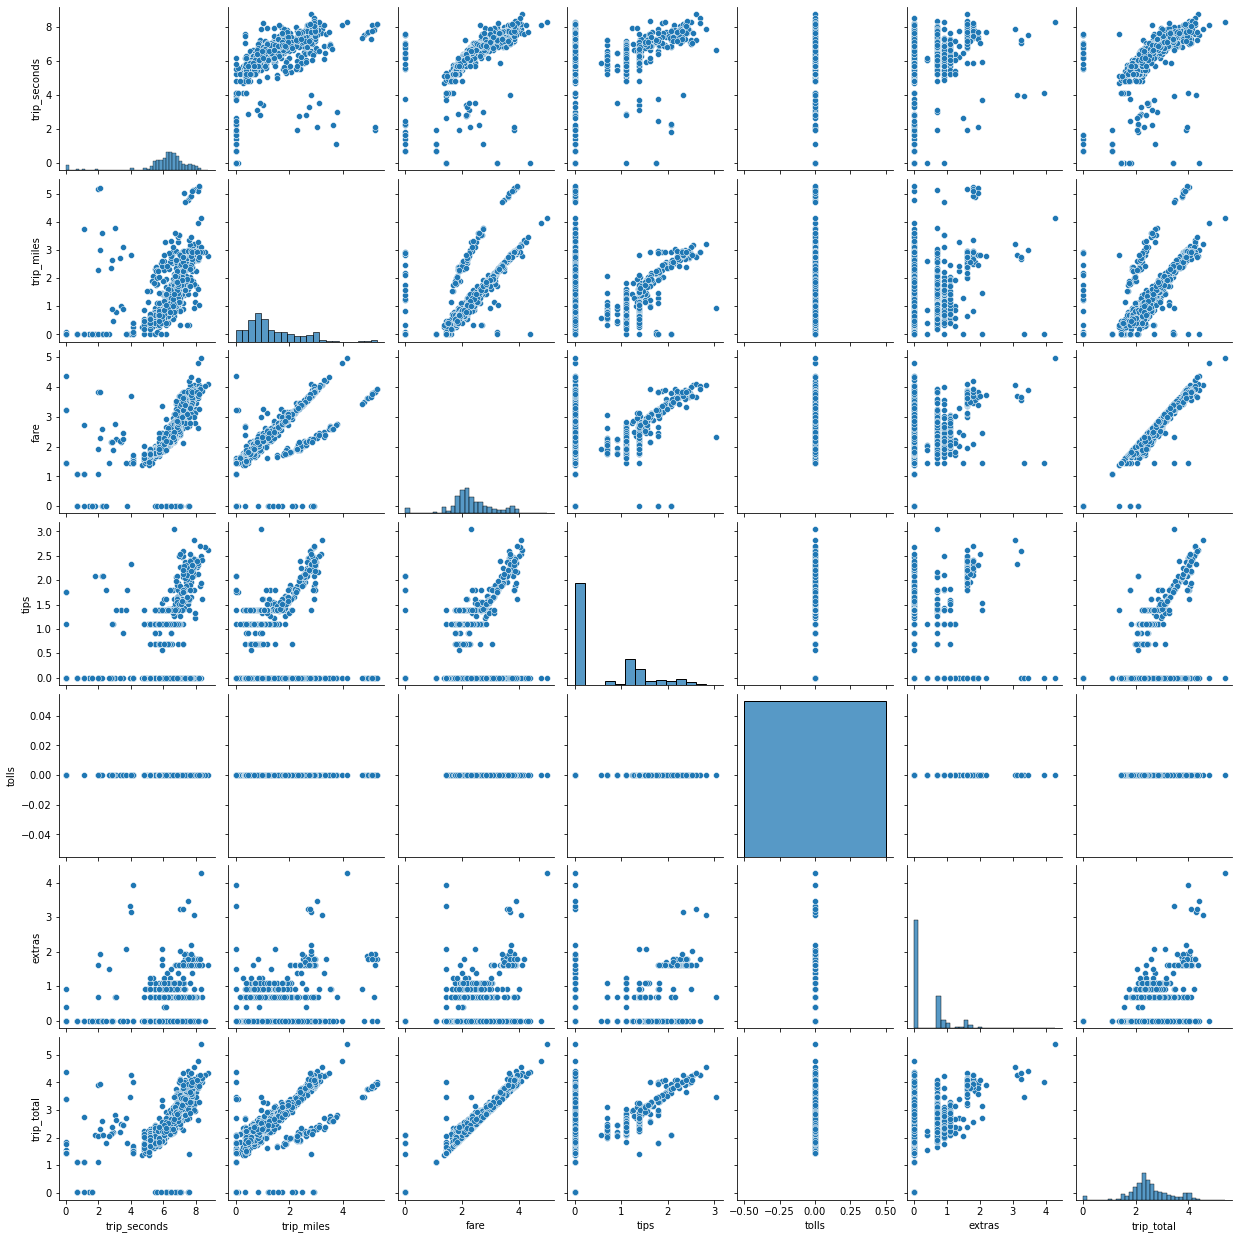

In [84]:
sns.pairplot(data=log_num_df)

Escalar los datos
- Min/Max Scaler: (x - Xmin) / (Xmax-xmin), se usa cuando sabemos que los minimos y maximos no van a cambiar
- Standar Scaler: (x-Media) / Desviación estandar

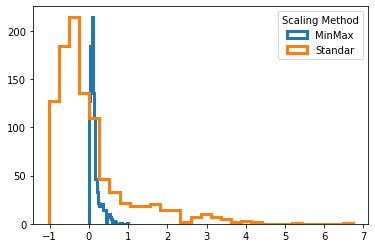

In [85]:
x=num_df["trip_seconds"]
x_min = x.min()
x_max= x.max()

x_mean = x.mean()
x_std = x.std()


x_minmax_scaled = (x-x_min) / (x_max-x_min)
x_std_scaled = (x-x_mean) / x_std


plt.hist(x_minmax_scaled, bins=30, label="MinMax", histtype="step", lw=3)
plt.hist(x_std_scaled, bins=30, label="Standar", histtype="step", lw=3)
plt.legend(title="Scaling Method")

In [86]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [87]:
#Transformar los datos en un rango de 0 a 1
minmax_scaler = MinMaxScaler().fit(num_df[cols])
data_min_max_scaled= minmax_scaler.transform(num_df[cols])

In [88]:
#Crear un data frame de las columnas transformadas
num_df_minmax_scaled = pd.DataFrame(columns=num_df[cols].columns, data=data_min_max_scaled)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556


In [89]:
num_df_minmax_scaled.describe()

,trip_total,trip_seconds,tips,fare,extras
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.075427,0.132603,0.078904,0.093930,0.013472
std,0.078186,0.128836,0.133767,0.094420,0.049445
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033366,0.055689,0.000000,0.041313,0.000000
50%,0.047191,0.096154,0.000000,0.058556,0.000000
75%,0.080603,0.153846,0.100000,0.101748,0.013889
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
#Tarea: Estudio de correlaciones con minmax_Scaler y standard_scaler

In [91]:
minmax_scaler = MinMaxScaler().fit(log_num_df)
data_min_max_scaled= minmax_scaler.transform(log_num_df)

In [92]:
num_df_minmax_scaled_log = pd.DataFrame(columns=log_num_df.columns, data=data_min_max_scaled)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556


In [93]:
num_df_minmax_scaled_log.describe()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total
count,1000.000000,1000.000000,1000.000000,1000.000000,907.0,1000.000000,1000.000000
mean,0.698215,0.257271,0.474730,0.192719,0.0,0.088878,0.468891
std,0.182581,0.182253,0.158184,0.256363,0.0,0.140038,0.148883
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.669834,0.131211,0.389243,0.000000,0.0,0.000000,0.390780
50%,0.732197,0.201547,0.450643,0.000000,0.0,0.000000,0.448488
75%,0.785909,0.360765,0.552447,0.360849,0.0,0.161555,0.541036
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000
